## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [14]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

In [15]:
train, test = keras.datasets.cifar10.load_data()

In [16]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [17]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [18]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [20]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5, 0.7]
redice_lr_patient = [5, 10]

In [23]:
import itertools

results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5


W0723 22:36:32.110222 13600 deprecation.py:323] From C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
__________

50000/50000 [==============================] - 4s 72us/step - loss: 1.3833 - acc: 0.5150 - val_loss: 1.5500 - val_acc: 0.4571
Epoch 14/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.3656 - acc: 0.5204 - val_loss: 1.5390 - val_acc: 0.4586
Epoch 15/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.3476 - acc: 0.5283 - val_loss: 1.5317 - val_acc: 0.4600
Epoch 16/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.3315 - acc: 0.5345 - val_loss: 1.5225 - val_acc: 0.4622
Epoch 17/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.3149 - acc: 0.5389 - val_loss: 1.5227 - val_acc: 0.4660
Epoch 18/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.3018 - acc: 0.5446 - val_loss: 1.5176 - val_acc: 0.4693
Epoch 19/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.2873 - acc: 0.5499 - val_loss: 1.5134 - val_acc: 0.4712
Epoch 20/25
50000/50000 [=====================

50000/50000 [==============================] - 5s 99us/step - loss: 2.3253 - acc: 0.2383 - val_loss: 2.2251 - val_acc: 0.2865
Epoch 2/25
50000/50000 [==============================] - 4s 74us/step - loss: 1.8931 - acc: 0.3487 - val_loss: 1.9646 - val_acc: 0.3378
Epoch 3/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.7484 - acc: 0.3909 - val_loss: 1.7937 - val_acc: 0.3828
Epoch 4/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.6669 - acc: 0.4174 - val_loss: 1.7396 - val_acc: 0.3989
Epoch 5/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.6121 - acc: 0.4367 - val_loss: 1.6827 - val_acc: 0.4145
Epoch 6/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.5691 - acc: 0.4521 - val_loss: 1.6528 - val_acc: 0.4223
Epoch 7/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.5310 - acc: 0.4644 - val_loss: 1.6282 - val_acc: 0.4317
Epoch 8/25
50000/50000 [============================

50000/50000 [==============================] - 4s 77us/step - loss: 0.3669 - acc: 0.8997 - val_loss: 1.6369 - val_acc: 0.5203
Epoch 24/25
50000/50000 [==============================] - 4s 77us/step - loss: 0.3478 - acc: 0.9067 - val_loss: 1.6486 - val_acc: 0.5257
Epoch 25/25
50000/50000 [==============================] - 4s 77us/step - loss: 0.3317 - acc: 0.9114 - val_loss: 1.7240 - val_acc: 0.5152
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_laye

50000/50000 [==============================] - 4s 79us/step - loss: 1.0651 - acc: 0.6326 - val_loss: 1.4335 - val_acc: 0.4866
Epoch 11/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.0297 - acc: 0.6460 - val_loss: 1.4825 - val_acc: 0.4758
Epoch 12/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.0001 - acc: 0.6562 - val_loss: 1.4982 - val_acc: 0.4705
Epoch 13/25
50000/50000 [==============================] - 4s 79us/step - loss: 0.9706 - acc: 0.6676 - val_loss: 1.4637 - val_acc: 0.4881
Epoch 14/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.9423 - acc: 0.6783 - val_loss: 1.4356 - val_acc: 0.4934
Epoch 15/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.9156 - acc: 0.6889 - val_loss: 1.4080 - val_acc: 0.5104
Epoch 16/25
50000/50000 [==============================] - 4s 80us/step - loss: 0.8866 - acc: 0.7005 - val_loss: 1.4841 - val_acc: 0.4875
Epoch 17/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 117us/step - loss: 1.8414 - acc: 0.3659 - val_loss: 2.1763 - val_acc: 0.3125
Epoch 2/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.5329 - acc: 0.4577 - val_loss: 2.1876 - val_acc: 0.3302
Epoch 3/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.4173 - acc: 0.4982 - val_loss: 2.3548 - val_acc: 0.2798
Epoch 4/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.3395 - acc: 0.5241 - val_loss: 1.8563 - val_acc: 0.3905
Epoch 5/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.2732 - acc: 0.5492 - val_loss: 1.8661 - val_acc: 0.3877
Epoch 6/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.2113 - acc: 0.5732 - val_loss: 1.8766 - val_acc: 0.3490
Epoch 7/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.1681 - acc: 0.5909 - val_loss: 1.9849 - val_ac

50000/50000 [==============================] - 4s 76us/step - loss: 0.7313 - acc: 0.7564 - val_loss: 1.8373 - val_acc: 0.4315
Epoch 24/25
50000/50000 [==============================] - 4s 76us/step - loss: 0.7076 - acc: 0.7641 - val_loss: 1.7553 - val_acc: 0.4456

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 25/25
50000/50000 [==============================] - 4s 76us/step - loss: 0.6233 - acc: 0.8033 - val_loss: 1.5212 - val_acc: 0.5009
Numbers of exp: 10, reduce_factor: 0.70, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_43 (Batc (None, 256)               1024   

50000/50000 [==============================] - 4s 78us/step - loss: 1.2719 - acc: 0.5591 - val_loss: 1.5764 - val_acc: 0.4536
Epoch 10/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.2403 - acc: 0.5703 - val_loss: 1.5329 - val_acc: 0.4627
Epoch 11/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.2093 - acc: 0.5821 - val_loss: 1.5497 - val_acc: 0.4634
Epoch 12/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.1837 - acc: 0.5941 - val_loss: 1.5234 - val_acc: 0.4678
Epoch 13/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.1559 - acc: 0.6033 - val_loss: 1.5136 - val_acc: 0.4702
Epoch 14/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.1303 - acc: 0.6120 - val_loss: 1.5066 - val_acc: 0.4761
Epoch 15/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.1078 - acc: 0.6225 - val_loss: 1.4861 - val_acc: 0.4774
Epoch 16/25
50000/50000 [=====================

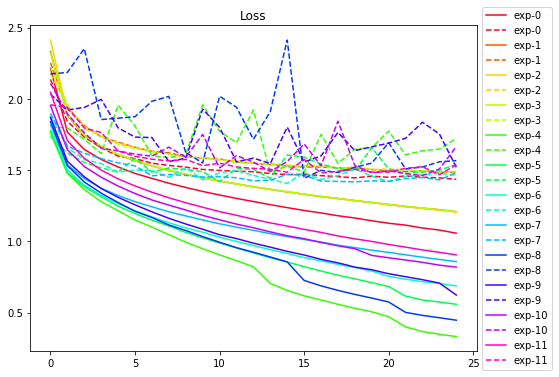

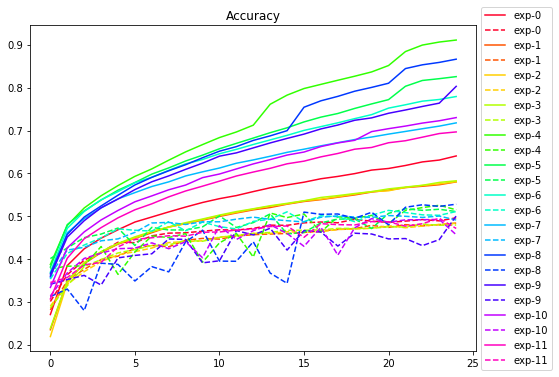

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()